## Sentiment Analysis in Financial Markets
### Exploratory Data Analysis

Analyze news articles, financial reports, or social media to gauge market sentiment. This project would involve natural language processing (NLP) techniques to understand how sentiment affects stock prices.

### Stocks to focus on 

- Tesla (Tsla)

- Apple Inc. (AAPL)

- Amazon.com Inc. (AMZN)

- Alphabet Inc. (GOOGL)

- Microsoft Corporation (MSFT)

- Facebook, Inc. (META)

- JPMorgan Chase & Co. (JPM)

- NVIDIA Corporation (NVDA)


### Stock Market History Data - data clensing 

In [1]:
import yfinance as yf
import pandas as pd

c:\Users\Ethan Vaz Falcao\anaconda3\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [55]:
df_stocks=pd.read_csv('data/stocks/df_stocks.csv', sep=",")
df_stocks.drop(index=1, inplace=True)
df_stocks.head(3)

,Ticker,TSLA,TSLA.1,TSLA.2,TSLA.3,TSLA.4,TSLA.5,GOOG,GOOG.1,GOOG.2,...,AMZN.2,AMZN.3,AMZN.4,AMZN.5,AAPL,AAPL.1,AAPL.2,AAPL.3,AAPL.4,AAPL.5
0,Price,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,...,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume
2,2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,15.615220069885254,15.678980827331543,15.547722816467285,...,6.6570000648498535,6.695000171661377,6.695000171661377,151998000,7.622499942779541,7.660714149475098,7.585000038146973,7.643214225769043,6.479000091552734,493729600
3,2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,15.620948791503906,15.6373872756958,15.480475425720215,...,6.5904998779296875,6.734499931335449,6.734499931335449,177038000,7.664286136627197,7.699643135070801,7.6160712242126465,7.656428813934326,6.490199089050293,601904800


In [56]:
#pivot and trasnform structure to a long format where each row represents a single day's data for a single stock.

# Clean up the dataset by removing the first two rows and setting a proper header

# Dropping the first row as the header
df_stocks_corrected = df_stocks.drop(index=[0]).reset_index(drop=True)
new_columns = ['Date'] + [f"{col.split('.')[0]}_{col.split('.')[-1]}" if '.' in col else col for col in df_stocks.columns[1:]]
df_stocks_corrected.columns = new_columns

# Convert 'Date' to datetime
df_stocks_corrected['Date'] = pd.to_datetime(df_stocks_corrected['Date'])

# Now, melt the dataframe to long format
df_stocks_melted = df_stocks_corrected.melt(id_vars=['Date'], var_name='Stock_Metric', value_name='Value')

# Split 'Stock_Metric' into separate 'Stock' and 'Metric' columns
df_stocks_melted[['Stock', 'Metric']] = df_stocks_melted['Stock_Metric'].str.split('_', expand=True)

# Drop the original 'Stock_Metric' column and any rows with NaN values in 'Value'
df_stocks_melted = df_stocks_melted.drop(columns=['Stock_Metric']).dropna(subset=['Value'])

# Convert 'Value' to numeric, handling errors for conversion
df_stocks_melted['Value'] = pd.to_numeric(df_stocks_melted['Value'], errors='coerce')

# Pivot 'Metric' to create separate columns for each metric
df_stocks_pivoted = df_stocks_melted.pivot_table(index=['Date', 'Stock'], columns='Metric', values='Value', aggfunc='first').reset_index()
df_stocks = df_stocks_pivoted

df_stocks.head(), df_stocks.dtypes


(Metric       Date Stock          1          2          3          4  \
 0      2010-01-04  AAPL   7.660714   7.585000   7.643214   6.479000   
 1      2010-01-04  AMZN   6.830500   6.657000   6.695000   6.695000   
 2      2010-01-04  GOOG  15.678981  15.547723  15.610239  15.610239   
 3      2010-01-04  MSFT  31.100000  30.590000  30.950001  23.474924   
 4      2010-01-05  AAPL   7.699643   7.616071   7.656429   6.490199   
 
 Metric            5  
 0       493729600.0  
 1       151998000.0  
 2        78541293.0  
 3        38409100.0  
 4       601904800.0  ,
 Metric
 Date     datetime64[ns]
 Stock            object
 1               float64
 2               float64
 3               float64
 4               float64
 5               float64
 dtype: object)

In [59]:
df_stocks.columns = ['Date', 'Stock', 'Open', 'Low', 'Close', 'Adjusted_Close', 'Volume']                                           

df_stocks.head()

,Date,Stock,Open,Low,Close,Adjusted_Close,Volume
0,2010-01-04,AAPL,7.660714,7.585000,7.643214,6.479000,493729600.0
1,2010-01-04,AMZN,6.830500,6.657000,6.695000,6.695000,151998000.0
2,2010-01-04,GOOG,15.678981,15.547723,15.610239,15.610239,78541293.0
3,2010-01-04,MSFT,31.100000,30.590000,30.950001,23.474924,38409100.0
4,2010-01-05,AAPL,7.699643,7.616071,7.656429,6.490199,601904800.0


In [63]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17488 entries, 0 to 17487
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            17488 non-null  datetime64[ns]
 1   Stock           17488 non-null  object        
 2   Open            17488 non-null  float64       
 3   Low             17488 non-null  float64       
 4   Close           17488 non-null  float64       
 5   Adjusted_Close  17488 non-null  float64       
 6   Volume          17488 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 956.5+ KB


### Stock Market History Data - EDA 

In [64]:
df_stocks.describe()

,Open,Low,Close,Adjusted_Close,Volume
count,17488.000000,17488.000000,17488.000000,17488.000000,1.748800e+04
mean,73.532203,71.654016,72.623488,71.149936,1.036760e+08
std,79.331170,77.006897,78.197693,77.981246,1.321192e+08
min,1.108667,0.998667,1.053333,1.053333,1.584340e+05
25%,17.740689,17.303750,17.502974,16.862466,3.394572e+07
50%,38.523001,37.952000,38.285000,36.643509,6.505175e+07
75%,108.060001,104.985003,106.650877,104.081625,1.122560e+08
max,414.496674,405.666656,409.970001,409.970001,1.880998e+09


##### Closing Price over the years 

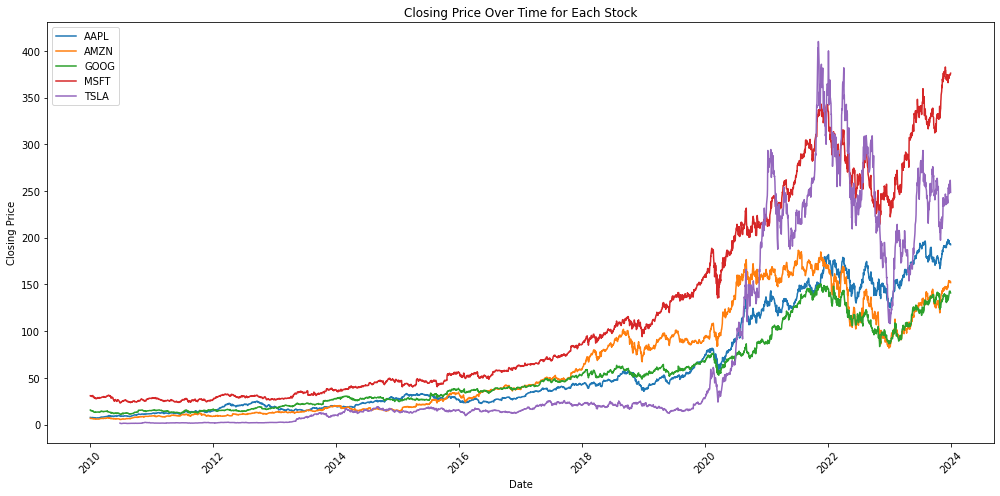

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Time Series Plot for each stock's closing price
plt.figure(figsize=(14, 7))
for stock in df_stocks['Stock'].unique():
    subset = df_stocks[df_stocks['Stock'] == stock]
    plt.plot(subset['Date'], subset['Close'], label=stock)

plt.title('Closing Price Over Time for Each Stock')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

##### Volume over the years 

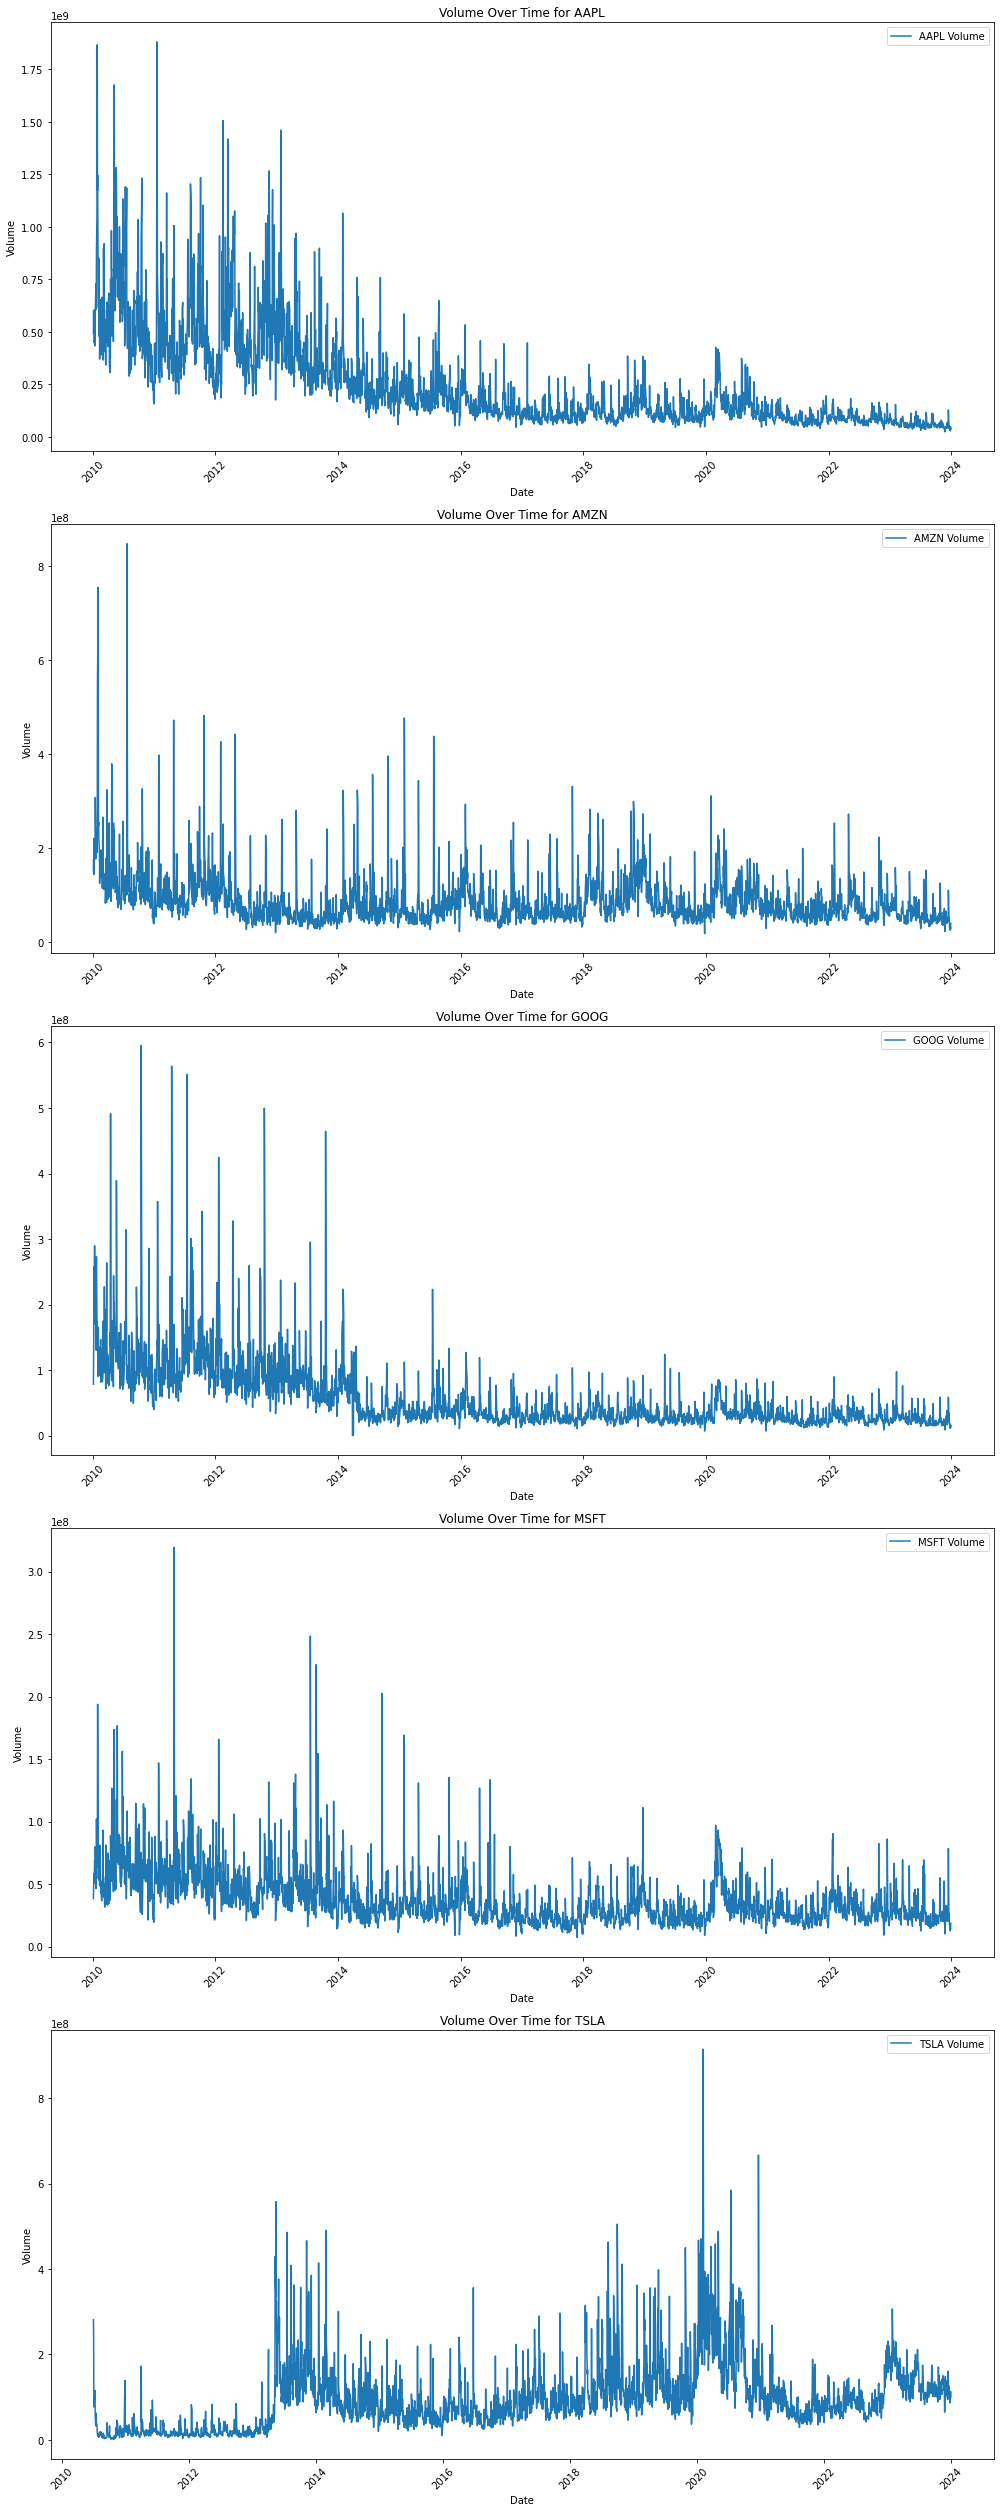

In [71]:
# Assuming df_stocks is your DataFrame and it has been properly formatted
unique_stocks = df_stocks['Stock'].unique()
n_stocks = len(unique_stocks)

# Set up the matplotlib figure
fig, axes = plt.subplots(n_stocks, 1, figsize=(14, 7*n_stocks)) # Adjust the size as needed

for i, stock in enumerate(unique_stocks):
    subset = df_stocks[df_stocks['Stock'] == stock]
    ax = axes[i] if n_stocks > 1 else axes
    ax.plot(subset['Date'], subset['Volume'], label=f'{stock} Volume')
    ax.set_title(f'Volume Over Time for {stock}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Volume')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()

In [74]:
import pandas as pd
import numpy as np
corr = df_stocks[['Open', 'Low', 'Close', 'Adjusted_Close', 'Volume']].corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,Open,Low,Close,Adjusted_Close,Volume
Open,1.000000,0.999679,0.999786,0.999465,-0.218471
Low,0.999679,1.000000,0.999803,0.999349,-0.222898
Close,0.999786,0.999803,1.000000,0.999611,-0.220610
Adjusted_Close,0.999465,0.999349,0.999611,1.000000,-0.220514
Volume,-0.218471,-0.222898,-0.220610,-0.220514,1.000000


Open, Low, Close, and Adjusted_Close prices are highly positively correlated with each other, simce because they are all measures of stock prices within the same trading day.

#### Moving Averages 
